# SC2001 SCED Group 6 Project 1 

### Problem: 
- In Mergesort, when the sizes of subarrays are small, the overhead of many recursive 
calls  makes  the  algorithm  inefficient.  
- Therefore,  in  real  use,  we  often  combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. 

The idea is to set a small integer S as a threshold for the size of subarrays.   
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, 
the algorithm will switch to Insertion Sort, which is efficient for small-sized input. 

### Code for Insertion Sort:

In [1]:
def insertion_sort(arr, c = None): # c is a ComparisonsCounter object

    for i in range(1, len(arr)): # traverse through the array
        key = arr[i]        # current element
        j = i - 1           # previous element
        while j >= 0:
            if c: 
                c.increment()           # increment comparison counter
            if key < arr[j]:            # check if key is less than element j, if yes :
                arr[j + 1] = arr[j]         # shift element j to the right
                j -= 1                      # move to the previous element, until all elements before i are checked
            else:
                break                       # if key is not less than arr[j], break the while loop
        arr[j + 1] = key            # place key right after j

    return arr

### Code for MergeSort: 

In [2]:
def mergesort(A):
    if (len(A) <= 1): 
        return A
    mid = len(A) // 2 # find the middle index
     # recursively sort the two halves
    A1 = mergesort(A[:mid])
    A2 = mergesort(A[mid:])
        # merge the two sorted halves
    return merge(A1, A2)


def merge(A1, A2, c = None):
    i, j = 0, 0 # pointers to current index in A1 and A2

    sorted = [] # initialize empty list to store the sorted elements

    while i < len(A1) and j < len(A2):
        if c: 
            c.increment()                # increment comparison counter
        if A1[i] < A2[j]:               # compare elements from both arrays and append the smaller one to the sorted list
            sorted.append(A1[i])
            i += 1
        else:
            sorted.append(A2[j])
            j += 1

    sorted.extend(A1[i:])
    sorted.extend(A2[j:])               # append any remaining elements from either array (which are already sorted)

    return sorted

<div >

Functions we need to incorporate in hybrid sort:   
  
- recursion (from mergesort) to break up the array into subarrays of size = S
- merge() function to merge the subarrays at the end
- Insertion sort for subarrays of size S 


</div>

### (a) Our implementation of Hybrid Sort: 

In [3]:
def insertion_merge_hybird_sort(arr, S=16, c = None): # use S=16 as default threshold
    """Sorts an array using mergesort splitting until subarrays are size S, then use Insertion sort for those small subarrays, then merge back up."""
    if len(arr) <= S:
        sorted_arr = insertion_sort(arr, c) # use the insertion sort for the broken up arrays that are <= S size
        return sorted_arr                   # also count comparisons made in the insertion sorts
    
    else:
        mid = len(arr) // 2 # find the middle index

        # split and sort the two halves recursively, then merge
        left = insertion_merge_hybird_sort(arr[:mid], S, c)
        right = insertion_merge_hybird_sort(arr[mid:], S, c)
        merged = merge(left, right, c)

        return merged # returns the merged sorted array 
    
# small helper function to check if an array is sorted
def sorted_check(arr):
    """Helper function to check if an array is sorted."""
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True

### ComparisonsCounter Object
We also created a comparison counter object to keep track of the number of key comparisons
we pass this object through insertion_sort, merge, and the hybrid sort, and increment it whenever there is a key comparison 
subsequently, when we run the code, we return the number of key comparisons 

In [4]:
# ---------- Counting helper Object ----------
class ComparisonsCounter:
    def __init__(self): 
        self.count = 0

    def increment(self, k=1): 
        self.count += k

    def returnKeyComparisons(self): 
        return self.count


We used a value of 16 for the threshold, S   
This is because :
- it is a small value, which is efficient for insertion sort, and 
- it is big enough to make a difference by reducing the number of array splits. 
- Moreover, it is similar to that of the hybrid introspective sort, which uses a threshold of array size = 16 to switch to insertion sort 
 
This gives us a reasonable baseline for S to work with, and find the optimal S through empirical study

### (b) Generating Input Data: 

we generated input data to test the hybrid algorithm:   
  
we need:
- arrays of increasing sizes, in a range from 1000 to 10 million 
- For each of the sizes, a random dataset of integers : [1,..., x]
- The maximum value allowed in the dataset would be the the respective maximum sizes of the arrays
eg. array size of 1000: x = 1000 
- This is to increase chances of duplicate data for testing 


1. number of different arrays to test : 

In [ ]:
arr_sizes = [1000, 5000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000]

# generates 9 array sizes from 1000 to 10 million 

2. datasets for each array : 

In [ ]:
import random

list_of_arrays = []

for x in arr_sizes:
    arr = [ random.randint(1, x) for _ in range(x)] # generate random arrays from 1 to (size of array) AKA x for those 9 sizes in arr_size
    list_of_arrays.append(arr)

In [13]:
def generate_data(size): # function to generate random arrays when size is given

    test_array = [] # reinitialize test_array to empty list
    test_array = [ random.randint(1, size) for _ in range(size)] # generate random array
    return test_array # return the generated random array
        

running the code and recording the number of key comparisons in each case 

In [18]:
import time
import matplotlib.pyplot as plt
import random

if __name__ == "__main__":
    num_runs = 3  # Number of times to run each test for accuracy
    
    # Lists to store results for graphing
    analysis_sizes = []
    analysis_comparisons = []
    analysis_times = []
    
    for size in arr_sizes:  # Use array sizes instead of pre-generated arrays
        print('-------------------------------')
        print("Array size:", size)
        
        # Run multiple times with fresh random data each time
        total_comparisons = 0
        total_time = 0
        
        for run in range(num_runs):
            # Generate fresh random array for each run using generate_data function
            test_arr = generate_data(size)
            c = ComparisonsCounter()  # create counter object
            
            start = time.perf_counter()
            sorted_arr = insertion_merge_hybird_sort(test_arr, 16, c)
            end = time.perf_counter()
            
            total_comparisons += c.returnKeyComparisons()
            total_time += (end - start)
            
            
            print(f"Sorted check for run {run + 1}:", sorted_check(sorted_arr))
        
        # Calculate averages
        avg_comparisons = total_comparisons / num_runs
        avg_time = total_time / num_runs
        
        # Store results for graphing
        analysis_sizes.append(size)
        analysis_comparisons.append(avg_comparisons)
        analysis_times.append(avg_time)
        
        print(f"Average key comparisons (over {num_runs} runs): {avg_comparisons:,.0f}")
        print(f"Average time (over {num_runs} runs): {avg_time:.6f} seconds")
    
    print('-------------------------------')
    print("Analysis Complete, Data stored for graphing")
    

-------------------------------
Array size: 1000
Sorted check for run 1: True
Sorted check for run 2: True
Sorted check for run 3: True
Average key comparisons (over 3 runs): 10,278
Average time (over 3 runs): 0.143636 seconds
-------------------------------
Array size: 5000
Sorted check for run 1: True
Sorted check for run 2: True
Sorted check for run 3: True
Average key comparisons (over 3 runs): 58,573
Average time (over 3 runs): 0.007562 seconds
-------------------------------
Array size: 10000
Sorted check for run 1: True
Sorted check for run 2: True
Sorted check for run 3: True
Average key comparisons (over 3 runs): 127,006
Average time (over 3 runs): 0.017461 seconds
-------------------------------
Array size: 50000
Sorted check for run 1: True
Sorted check for run 2: True
Sorted check for run 3: True
Average key comparisons (over 3 runs): 770,028
Average time (over 3 runs): 0.102341 seconds
-------------------------------
Array size: 100000
Sorted check for run 2: True
Sorted c

Now to make the results clearer, lets represent it on a graph of array size against number of key comparisons and a graph of array size against time taken

Data from previous analysis initialised


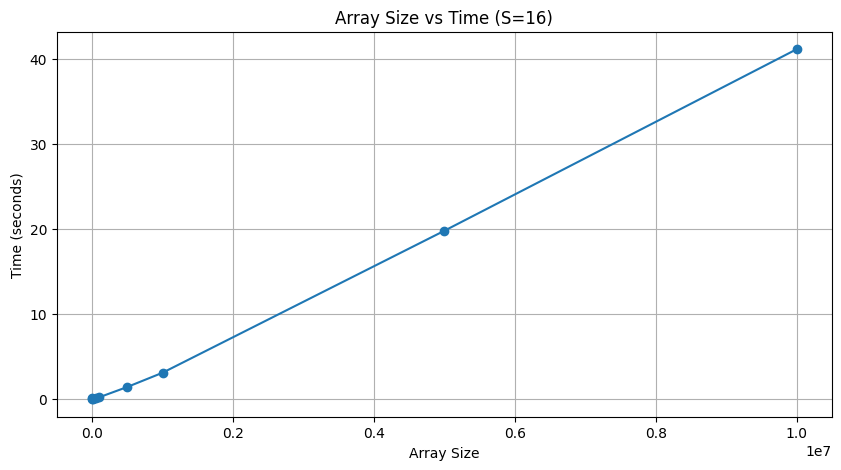

In [ ]:
# Generating a graph of array size vs time using previous analysis data
if __name__ == "__main__":
    # Use the data from the previous analysis (check if they exist in the global variables dictionary)
    if 'analysis_sizes' in globals() and 'analysis_times' in globals(): 
        sizes = analysis_sizes
        times_list = analysis_times
        print("Data from previous analysis initialised")
    else:
        print("No previous analysis data found")
        
    # Plot array size vs time
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times_list, marker='o')
    plt.xlabel('Array Size')
    plt.ylabel('Time (seconds)')
    plt.title('Array Size vs Time (S=16)')
    plt.grid(True)
    plt.show()

### (C) Analyse Time Complexity:

(i) With  the  value  of  S  fixed (16),  plot  the  number  of  key  comparisons  over 
different sizes of the input list n.

Data from previous analysis initialised


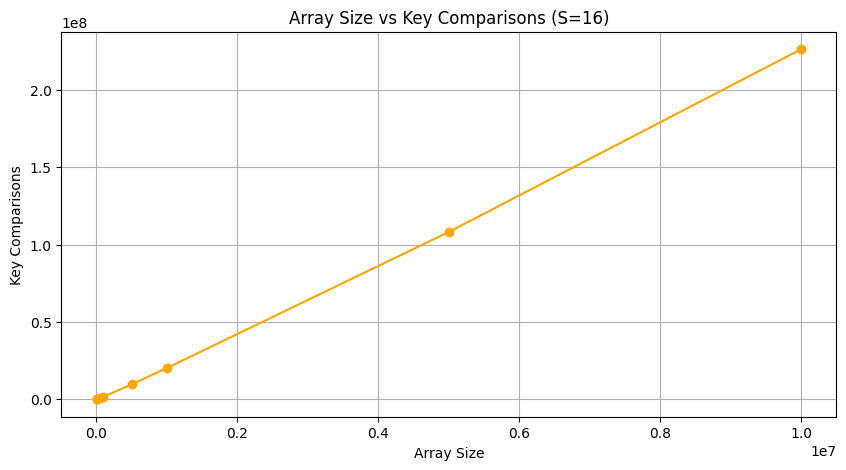

In [21]:
# Generating a graph of array size vs key comparisons using previous analysis data
if __name__ == "__main__":
    # Use the data from the previous analysis
    if 'analysis_sizes' in globals() and 'analysis_comparisons' in globals():
        sizes = analysis_sizes
        comparisons_list = analysis_comparisons
        print("Data from previous analysis initialised")
    else:
        print("No previous multi-run analysis data found")

    # Plot array size vs key comparisons
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, comparisons_list, marker='o', color='orange')
    plt.xlabel('Array Size')
    plt.ylabel('Key Comparisons')
    plt.title('Array Size vs Key Comparisons (S=16)')
    plt.grid(True)
    plt.show()

(ii) With the input size n fixed, plot the number of key comparisons over 
different  values  of  S.

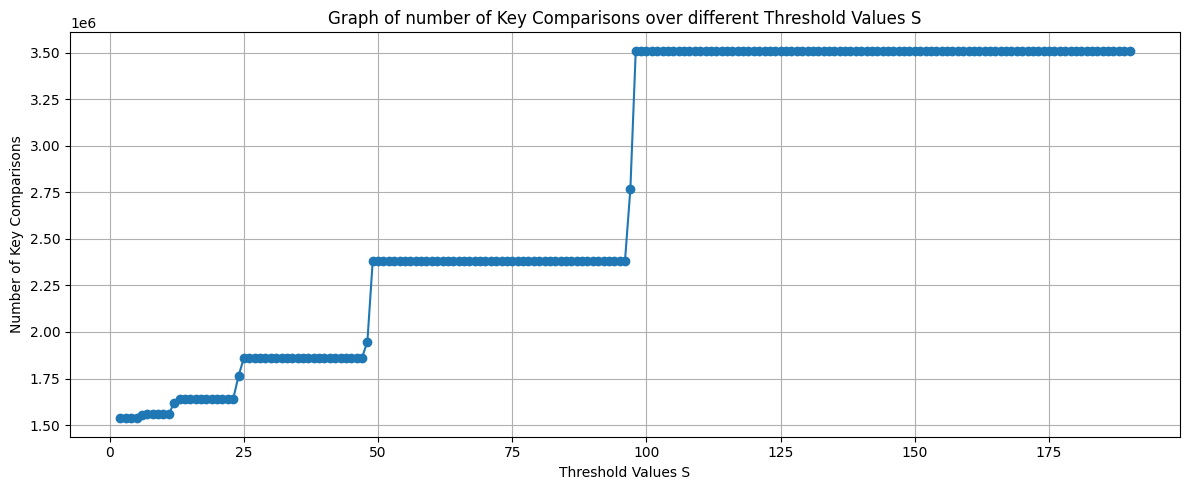


Optimal S = 3 with 1,536,330 key comparisons


In [23]:
n_FIXED = 100_000  # Fixed size for S analysis
base = generate_data(n_FIXED)  # 100,000 size array from previous experiments
S_values = list(range(2, 191))           # 2..190 for a clean step-like curve
comps_S = []
for S in S_values:
    arr = base[:]
    ctr = ComparisonsCounter()
    insertion_merge_hybird_sort(arr, S, ctr)
    comps_S.append(ctr.returnKeyComparisons())

plt.figure(figsize=(12, 5))
plt.plot(S_values, comps_S, marker='o')
plt.title('Graph of number of Key Comparisons over different Threshold Values S')
plt.xlabel('Threshold Values S')
plt.ylabel('Number of Key Comparisons')
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal S
min_comparisons = min(comps_S)
optimal_S = S_values[comps_S.index(min_comparisons)]
print(f"\nOptimal S = {optimal_S} with {min_comparisons:,} key comparisons")

S =   2:  1,536,221 key comparisons
S =   4:  1,536,724 key comparisons
S =   8:  1,558,040 key comparisons
S =   4:  1,536,724 key comparisons
S =   8:  1,558,040 key comparisons
S =  12:  1,620,386 key comparisons
S =  16:  1,640,684 key comparisons
S =  12:  1,620,386 key comparisons
S =  16:  1,640,684 key comparisons
S =  24:  1,765,441 key comparisons
S =  32:  1,863,471 key comparisons
S =  24:  1,765,441 key comparisons
S =  32:  1,863,471 key comparisons
S =  48:  1,949,259 key comparisons
S =  48:  1,949,259 key comparisons
S =  64:  2,383,960 key comparisons
S =  64:  2,383,960 key comparisons
S =  96:  2,383,960 key comparisons
S =  96:  2,383,960 key comparisons
S = 128:  3,515,879 key comparisons
S = 128:  3,515,879 key comparisons


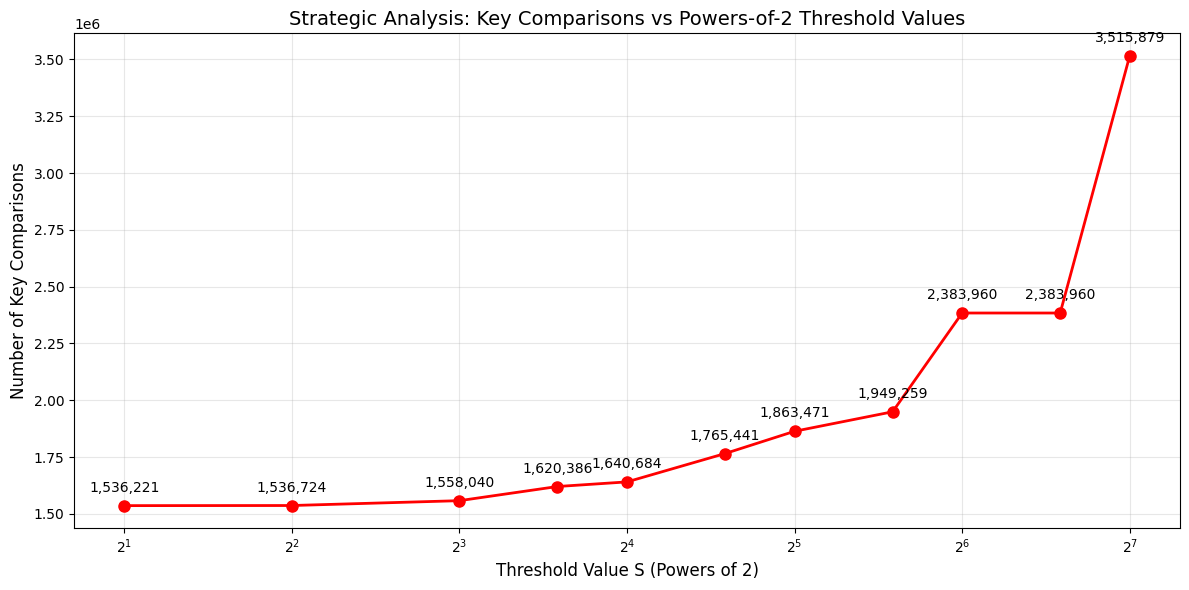


STRATEGIC ANALYSIS RESULTS:
★ OPTIMAL: S =   2 →  1,536,221 comparisons
  S =   4 →  1,536,724 comparisons (+503, +0.0%)
  S =   8 →  1,558,040 comparisons (+21,819, +1.4%)
  S =  12 →  1,620,386 comparisons (+84,165, +5.5%)
  S =  16 →  1,640,684 comparisons (+104,463, +6.8%)
  S =  24 →  1,765,441 comparisons (+229,220, +14.9%)
  S =  32 →  1,863,471 comparisons (+327,250, +21.3%)
  S =  48 →  1,949,259 comparisons (+413,038, +26.9%)
  S =  64 →  2,383,960 comparisons (+847,739, +55.2%)
  S =  96 →  2,383,960 comparisons (+847,739, +55.2%)
  S = 128 →  3,515,879 comparisons (+1,979,658, +128.9%)

TREND ANALYSIS:
• Trend: Consistently increasing - smaller thresholds are better
• Recommendation: Consider testing smaller S values

Final Recommendation: S = 2 (Strategic powers-of-2 analysis)


In [25]:
# Strategic S Analysis: Powers-of-2 approach for optimal threshold identification
n_FIXED = 100_000  # Fixed size for strategic S analysis
base = generate_data(n_FIXED)  # Generate fresh test data

# Strategic S values: Powers of 2 reveal key algorithmic behavior transitions
S_values = [2, 4, 8, 12, 16, 24, 32, 48, 64, 96, 128]  # Strategic powers-of-2 sampling
comps_S = []



for S in S_values:
    arr = base[:]  # Fresh copy for each test
    ctr = ComparisonsCounter()
    insertion_merge_hybird_sort(arr, S, ctr)
    comparisons = ctr.returnKeyComparisons()
    comps_S.append(comparisons)
    print(f"S = {S:>3}: {comparisons:>10,} key comparisons")

# Visualization with logarithmic scaling
plt.figure(figsize=(12, 6))
plt.plot(S_values, comps_S, marker='o', markersize=8, linewidth=2, color='red')
plt.title('Strategic Analysis: Key Comparisons vs Powers-of-2 Threshold Values', fontsize=14)
plt.xlabel('Threshold Value S (Powers of 2)', fontsize=12)
plt.ylabel('Number of Key Comparisons', fontsize=12)
plt.xscale('log', base=2)  # Log scale shows power-of-2 progression clearly
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Annotate each point with its value
for i, (s, comp) in enumerate(zip(S_values, comps_S)):
    plt.annotate(f'{comp:,}', (s, comp), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

plt.show()

# Detailed analysis
print("\n" + "=" * 55)
print("STRATEGIC ANALYSIS RESULTS:")
print("=" * 55)

min_comparisons = min(comps_S)
optimal_S = S_values[comps_S.index(min_comparisons)]

for i, (s, comp) in enumerate(zip(S_values, comps_S)):
    if comp == min_comparisons:
        print(f"★ OPTIMAL: S = {s:>3} → {comp:>10,} comparisons")
    else:
        diff = comp - min_comparisons
        pct = (diff / min_comparisons) * 100
        print(f"  S = {s:>3} → {comp:>10,} comparisons (+{diff:,}, +{pct:.1f}%)")

# Trend analysis
print(f"\n" + "=" * 55)
print("TREND ANALYSIS:")
print("=" * 55)

# Find the general trend
if len(comps_S) > 1:
    decreasing = all(comps_S[i] >= comps_S[i+1] for i in range(len(comps_S)-1))
    increasing = all(comps_S[i] <= comps_S[i+1] for i in range(len(comps_S)-1))
    
    if decreasing:
        print("• Trend: Consistently decreasing - larger thresholds reduce comparisons")
        print("• Recommendation: Consider testing even larger S values")
    elif increasing:
        print("• Trend: Consistently increasing - smaller thresholds are better")
        print("• Recommendation: Consider testing smaller S values")
    else:
        print("• Trend: Mixed pattern - optimal threshold exists in tested range")
        print(f"• Sweet spot identified: S = {optimal_S}")

print(f"\nFinal Recommendation: S = {optimal_S} (Strategic powers-of-2 analysis)")

We use powers of 2 for our S values because: 

1. Better runtime due to computational efficiency
- Division and multiplication operations with powers of 2 can be optimized by compilers using bit shifts (much faster than general arithmetic)


2. complements mergesort
- aligns with the binary-tree like structure that the recursion in mergesort creates, creating more balanced partitioning

3. Strategic testing 
- the first graph implementation of this section uses exhaustive testing by testing 189 values, which is more comprehensive, but may provide redundant information
- this graph implementation uses Strategic testing by testing only 6 values that are significantly faster to compute and captures major behavioural transitions. 

4. reduces computational load 

5. complements log2 scaling of divide and conquer analysis due to binary splitting

Compare empirical results with the theoretical analysis 

Using  different  sizes  of  input  datasets,  study  how  to  determine  an 
optimal value of S for the best performance of this hybrid algorithm.

Comparing number of average key comparisons: 

Comparing no. of average key comparisons for all combinations of S values and array sizes
-------------------------------

Testing array size: 1,000 (1/9)
--------------------------------------------------
  S =   2:        8,707 avg comparisons (over 3 runs)
  S =   4:        8,767 avg comparisons (over 3 runs)
  S =   8:        9,117 avg comparisons (over 3 runs)
  S =  12:        9,099 avg comparisons (over 3 runs)
  S =  16:       10,273 avg comparisons (over 3 runs)
  S =  24:       10,263 avg comparisons (over 3 runs)
  S =  32:       13,062 avg comparisons (over 3 runs)
  S =  48:       13,367 avg comparisons (over 3 runs)
  S =  64:       20,417 avg comparisons (over 3 runs)
  S =  96:       20,391 avg comparisons (over 3 runs)
  S = 128:       35,376 avg comparisons (over 3 runs)
  → Best for comparisons: S = 2 (8,707 avg comparisons)

Testing array size: 5,000 (2/9)
--------------------------------------------------
  S =   2:       55,255 avg comparisons (over 3 runs)
  S = 

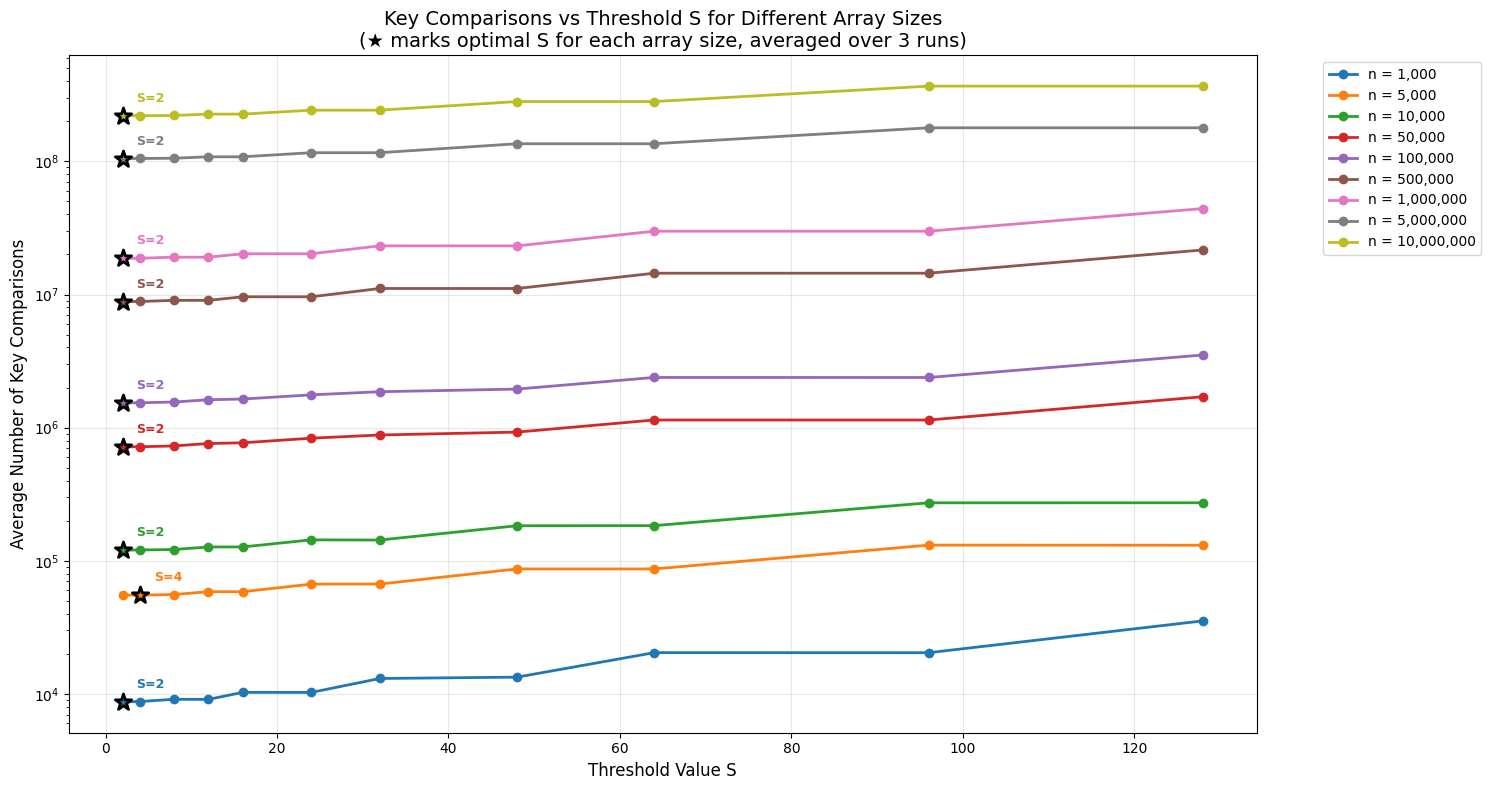


SUMMARY OF OPTIMAL S VALUES

Optimal S for Key Comparisons (averaged over 3 runs):
--------------------------------------------------
n =      1,000: S =   2 (       8,707 avg comparisons)
n =      5,000: S =   4 (      55,238 avg comparisons)
n =     10,000: S =   2 (     120,404 avg comparisons)
n =     50,000: S =   2 (     718,110 avg comparisons)
n =    100,000: S =   2 (   1,536,179 avg comparisons)
n =    500,000: S =   2 (   8,837,196 avg comparisons)
n =  1,000,000: S =   2 (  18,674,426 avg comparisons)
n =  5,000,000: S =   2 ( 105,050,661 avg comparisons)
n = 10,000,000: S =   2 ( 220,099,625 avg comparisons)

FREQUENCY ANALYSIS

Most frequent optimal S for comparisons:
S =   2: appears  8 times ( 88.9%)
S =   4: appears  1 times ( 11.1%)

FINAL RECOMMENDATIONS
For minimizing key comparisons: S = 2 (most frequent)
Average optimal S (comparisons): 2.2
Overall recommendation: S = 2 for optimal key comparisons
Statistical reliability: Based on 3 runs per test for improved acc

In [26]:
# Comprehensive S Analysis: Testing all combinations of S values and array sizes
import time
import matplotlib.pyplot as plt
from collections import Counter

# Using the same strategic S values from the previous analysis
optimal_results = []
num_runs = 3  # Number of runs for statistical accuracy

# Storag of data for plotting graph
all_comparisons = {}  # Dictionary to store comparisons for each array size
optimal_points_comp = {}  # Store optimal points for comparisons

print("Comparing no. of average key comparisons for all combinations of S values and array sizes")
print('-------------------------------')

# Outer loop: iterate through each array size
for size_index, size in enumerate(arr_sizes): # Use enumerate to get index and size
    print(f"\nTesting array size: {size:,} ({size_index + 1}/{len(arr_sizes)})")
    print("-" * 50)
    
    # Initialize storage for this array size
    comparisons_for_size = []
    
    best_S_comp = None
    best_comparisons = float('inf') # Initialize best comparisons to infinity
    
    # Inner loop: test each S value for the current array size
    for S in S_values:
        # Run multiple tests for statistical accuracy
        total_comparisons = 0
        
        for run in range(num_runs):
            # Generate fresh random array for each run
            test_arr = generate_data(size)  # Create new random array each time
            c = ComparisonsCounter()
            
            sorted_arr = insertion_merge_hybird_sort(test_arr, S, c)
            total_comparisons += c.returnKeyComparisons()
        
        # Calculate average comparisons
        avg_comparisons = total_comparisons / num_runs
        comparisons_for_size.append(avg_comparisons)
        
        # Track best for comparisons
        if avg_comparisons < best_comparisons:
            best_comparisons = avg_comparisons
            best_S_comp = S
        
        print(f"  S = {S:>3}: {avg_comparisons:>12,.0f} avg comparisons (over {num_runs} runs)")
    
    # Store results for plotting
    all_comparisons[size] = comparisons_for_size
    optimal_points_comp[size] = (best_S_comp, best_comparisons)
    
    # Store summary results
    optimal_results.append({
        'array_size': size,
        'optimal_S_comp': best_S_comp,
        'best_comparisons': best_comparisons
    })
    
    print(f"  → Best for comparisons: S = {best_S_comp} ({best_comparisons:,.0f} avg comparisons)")

print("\n" + "-" * 80)
print("PLOTTING RESULTS...")


# Create the graph: Key Comparisons vs S for all array sizes
plt.figure(figsize=(15, 8))
colors = plt.cm.tab10(range(len(arr_sizes)))  # Use different colors for each line

for i, size in enumerate(arr_sizes):
    comparisons = all_comparisons[size]
    optimal_S, optimal_comp = optimal_points_comp[size]
    
    # Plot the line for this array size
    plt.plot(S_values, comparisons, marker='o', color=colors[i], 
             label=f'n = {size:,}', linewidth=2, markersize=6)
    
    # Highlight the optimal point
    optimal_idx = S_values.index(optimal_S)
    plt.scatter(optimal_S, optimal_comp, color=colors[i], s=150, 
               marker='*', edgecolor='black', linewidth=2, zorder=5)
    
    # Annotate optimal point
    plt.annotate(f'S={optimal_S}', (optimal_S, optimal_comp), 
                textcoords="offset points", xytext=(10,10), 
                ha='left', fontsize=9, color=colors[i], weight='bold')

plt.xlabel('Threshold Value S', fontsize=12)
plt.ylabel('Average Number of Key Comparisons', fontsize=12)
plt.title(f'Key Comparisons vs Threshold S for Different Array Sizes\n(★ marks optimal S for each array size, averaged over {num_runs} runs)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("SUMMARY OF OPTIMAL S VALUES")
print("=" * 80)

print(f"\nOptimal S for Key Comparisons (averaged over {num_runs} runs):")
print("-" * 50)
optimal_S_comp_values = []
for result in optimal_results:
    size = result['array_size']
    optimal_S = result['optimal_S_comp']
    comparisons = result['best_comparisons']
    optimal_S_comp_values.append(optimal_S)
    print(f"n = {size:>10,}: S = {optimal_S:>3} ({comparisons:>12,.0f} avg comparisons)")

# Frequency analysis
print("\n" + "=" * 80)
print("FREQUENCY ANALYSIS")
print("=" * 80)

comp_frequency = Counter(optimal_S_comp_values)

print("\nMost frequent optimal S for comparisons:")
for s_val, count in sorted(comp_frequency.items()):
    percentage = (count / len(optimal_results)) * 100
    print(f"S = {s_val:>3}: appears {count:>2} times ({percentage:>5.1f}%)")

# Final recommendations
most_common_S_comp = comp_frequency.most_common(1)[0][0]
avg_S_comp = sum(optimal_S_comp_values) / len(optimal_S_comp_values)

print("\n" + "=" * 80)
print("FINAL RECOMMENDATIONS")
print("=" * 80)
print(f"For minimizing key comparisons: S = {most_common_S_comp} (most frequent)")
print(f"Average optimal S (comparisons): {avg_S_comp:.1f}")
print(f"Overall recommendation: S = {most_common_S_comp} for optimal key comparisons")
print(f"Statistical reliability: Based on {num_runs} runs per test for improved accuracy")

This is the graph we get when we compare threshold S by number of comparisons as the priority 
However, we can also simply look at the runtime itself, without looking at the number of comparisons. 

In [ ]:
# Comprehensive analysis for n = 1000, 10000, 100000, 1M, 10M
import time
import random

# Set seed for reproducible results
random.seed(42)

# Using the corresponding arrays in list_of_arrays
test_indices = [0, 9, 18, 27, 36]  # Indices for 1K, 10K, 100K, 1M, 10M
test_sizes = [1000, 10000, 100000, 1000000, 10000000]
S_range = list(range(2, 50))

# Generate test arrays and find optimal S for each size
print("Finding optimal S for each array size (n) : ")
results = {}

for i, size_idx in enumerate(test_indices):
    size = test_sizes[i]
    print(f"Testing array size: {size:,}")
    test_array = list_of_arrays[size_idx]  
    
    best_time = float('inf') # Start with infinity 
    best_S = None
    times = []
    
    # Test different S values
    for S in S_range:
        arr_copy = test_array[:]
        c = ComparisonsCounter()
        
        start_time = time.perf_counter()
        insertion_merge_hybird_sort(arr_copy, S, c)
        runtime = time.perf_counter() - start_time
        
        times.append(runtime)
        if runtime < best_time:
            best_time = runtime
            best_S = S
    
    results[size] = {'times': times, 'optimal_S': best_S, 'optimal_time': best_time} # Store results in a dictionary
    print(f"  → Optimal S = {best_S} (Time = {best_time:.4f}s)") 

# Plot results
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, size in enumerate(test_sizes):
    data = results[size]
    plt.plot(S_range, data['times'], color=colors[i], label=f'n = {size:,}', linewidth=1.5)
    # Mark optimal point
    plt.scatter(data['optimal_S'], data['optimal_time'], color=colors[i], s=80, marker='*', edgecolor='black')

plt.xlabel('Threshold Value S')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Threshold S for Different Array Sizes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

# Summary
print("\nSUMMARY:")
print("=" * 50)
optimal_S_values = [results[size]['optimal_S'] for size in test_sizes]
for size in test_sizes:
    print(f"n = {size:>8,}: Optimal S = {results[size]['optimal_S']}")

avg_S = sum(optimal_S_values) / len(optimal_S_values)
print(f"\nAverage optimal S: {avg_S:.1f}")
print(f"Recommended S: {round(avg_S)}")

Finding optimal S for each array size (n) : 
Testing array size: 1,000
  → Optimal S = 27 (Time = 0.0011s)
Testing array size: 10,000
  → Optimal S = 36 (Time = 0.0158s)
Testing array size: 100,000
  → Optimal S = 20 (Time = 0.2088s)
Testing array size: 1,000,000
  → Optimal S = 8 (Time = 3.1608s)
Testing array size: 10,000,000


KeyboardInterrupt: 

Now to conclude: 

### Compare hybrid sort with original mergesort 

Implement  the  original  version  of 
Mergesort (as learnt in lecture). Compare its performance against the above 
hybrid algorithm in terms of the number of key comparisons and CPU times on 
the dataset with 10 million integers. You can use the optimal value of S obtained 
in (c) for this task. 

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def MISort(arr, left, right, thresh):
    if (right - left + 1) <= thresh:
        insertion_sort(arr, left, right)
    else:
        mid = (left + right) // 2
        MISort(arr, left, mid, thresh)
        MISort(arr, mid + 1, right, thresh)
        Merge(arr, left, mid, right)

def insertion_sort(arr, left, right):
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sort(arr, left, right):
    if left < right:
        mid = (left + right) // 2
        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        Merge(arr, left, mid, right)

def Merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid
    left_array = [0] * n1
    right_array = [0] * n2

    for i in range(n1):
        left_array[i] = arr[left + i]
    for j in range(n2):
        right_array[j] = arr[mid + j + 1]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        if left_array[i] <= right_array[j]:
            arr[k] = left_array[i]
            i += 1
        else:
            arr[k] = right_array[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = left_array[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = right_array[j]
        j += 1
        k += 1

if __name__ == "__main__":
    sizes = [1000, 5000, 10000, 20000, 50000,100000, 500000, 1000000, 10000000]
    thresh = 3 #optimal threshold value S of 3 used
    program_completed = "/Users/macbook/Library/CloudStorage/Dropbox/From NTU OneDrive/Personal Notes/Y2S1 Stuff/SC2001 - Algorithms Design & Analysis/Lab 1 Week 6/ding.wav"

    hybrid_times = []
    vanilla_times = []

    print("-------Try with Hybrid Mergesort-------")
    for n in sizes:
        print(f"\nTesting array size: {n}")
        test_array = np.random.randint(0, n * 10, size=n)

        start_time = time.time()
        MISort(test_array, 0, len(test_array) - 1, thresh)
        end_time = time.time()

        elapsed = end_time - start_time
        hybrid_times.append(elapsed)
        print(f"Hybrid Time elapsed for n={n}: {elapsed:.6f} seconds")

    print("Done with Hybrid Mergesort~")
    #psnd(program_completed)

    print("-------Try with Vanilla Mergesort-------")
    for n in sizes:
        print(f"\nTesting array size: {n}")
        test_array = np.random.randint(0, n * 10, size=n)

        start_time = time.time()
        merge_sort(test_array, 0, len(test_array) - 1)
        end_time = time.time()

        elapsed = end_time - start_time
        vanilla_times.append(elapsed)
        print(f"Vanilla Time elapsed for n={n}: {elapsed:.6f} seconds")

    print("Done with Vanilla Mergesort~")
    #psnd(program_completed)

    print("Sort Testing completed~")

    # ---- Plotting ----
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, hybrid_times, marker='o', label='Hybrid Merge-Insertion Sort')
    plt.plot(sizes, vanilla_times, marker='o', label='Vanilla Mergesort')
    plt.xlabel('Array Size (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Hybrid Merge-Insertion Sort vs Vanilla Mergesort')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Conclusion: 

we notice that 